In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, roc_curve, precision_recall_curve
import matplotlib

In [44]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]
print(y.unique())
X.head()

['M' 'B']


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
y[y=='M'] = 1
y[y=='B'] = 0
y=y.astype('int')
print('Pacijenata iz klase maligno ima: ', (y==1).sum(), ', a iz klase benigno: ', (y==0).sum())
print(y.unique())

Pacijenata iz klase maligno ima:  212 , a iz klase benigno:  357
[1 0]


D:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
#provera nedostajucih vrednosti
print(X.isnull().sum().sum())

0


In [48]:
def mere_uspesnosti(mat_konf):    
    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print('precision: ', precision)
    print('accuracy: ', accuracy)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    print('F score: ', F_score)

In [49]:
# podela podataka na skup za obuku, validaciju i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10, stratify=y_train)


In [50]:
recall = []
for num in [100, 200, 500, 1000]:
    for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        classifier = LogisticRegression(max_iter=num, solver=solv)
        classifier.fit(X_train_1, y_train_1)
        y_pred = classifier.predict(X_val)  
        print('za parametre ', num, ' i ', solv, ' preciznost je: ', recall_score(y_val, y_pred), 
              ' a tacnost: ', accuracy_score(y_val, y_pred)) 
        recall.append(recall_score(y_val, y_pred))
print('najbolja preciznost je u iteraciji broj: ', np.argmax(recall))

za parametre  100  i  newton-cg  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  100  i  lbfgs  preciznost je:  0.8947368421052632  a tacnost:  0.9423076923076923
za parametre  100  i  liblinear  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  100  i  sag  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  100  i  saga  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  200  i  newton-cg  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre 

D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Program Files\Python\lib\site-packages\skl

 200  i  lbfgs  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  200  i  liblinear  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  200  i  sag  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  200  i  saga  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  500  i  newton-cg  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231


D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Program Files\Python\lib\site-packages\skl

za parametre  500  i  lbfgs  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  500  i  liblinear  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  500  i  sag  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  500  i  saga  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  1000  i  newton-cg  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231


D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


za parametre  1000  i  lbfgs  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231
za parametre  1000  i  liblinear  preciznost je:  0.8421052631578947  a tacnost:  0.9230769230769231


D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Program Files\Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


za parametre  1000  i  sag  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
za parametre  1000  i  saga  preciznost je:  0.7368421052631579  a tacnost:  0.8846153846153846
najbolja preciznost je u iteraciji broj:  1


th:  [2.00000000e+00 1.00000000e+00 9.40307970e-01 2.71115308e-01
 2.51977111e-01 1.45489927e-01 1.39163735e-01 1.18209976e-01
 1.04332320e-01 1.23425380e-07]
recall:  [0.         0.05263158 0.84210526 0.84210526 0.89473684 0.89473684
 0.94736842 0.94736842 1.         1.        ]
specificity:  [1.         1.         1.         0.93939394 0.93939394 0.90909091
 0.90909091 0.84848485 0.84848485 0.        ]


Text(0.5, 1.0, 'ROC curve')

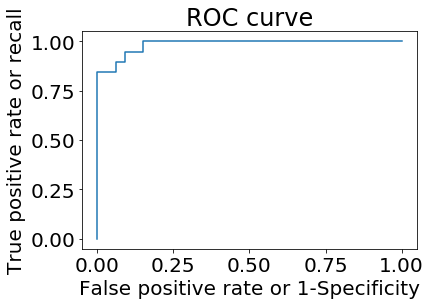

In [51]:
classifier = LogisticRegression(max_iter=100, solver='newton-cg')
classifier.fit(X_train_1, y_train_1)
y_pred = classifier.predict(X_val) 
y_pred_prob = classifier.predict_proba(X_val)[:, 1]
fpr, tpr, threshold = roc_curve(y_val, y_pred_prob)
print('th: ', threshold)
print('recall: ', tpr)
print('specificity: ', 1-fpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate or 1-Specificity')
plt.ylabel('True positive rate or recall')
plt.title('ROC curve')

In [52]:
classifier = LogisticRegression(max_iter=100, solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
conf_mat = confusion_matrix(y_test, y_pred) 
print(conf_mat)
mere_uspesnosti(conf_mat)
wrong_predicted = (y_test != y_pred)
print('procenat sigurnosti u pogresnim: ', classifier.predict_proba(X_test.loc[wrong_predicted,:]))
print('prosecno siguran u ispravnim: ', classifier.predict_proba(X_test.loc[~wrong_predicted,:]).max(axis=0).mean())

[[35  1]
 [ 2 19]]
precision:  0.95
accuracy:  0.9473684210526315
sensitivity/recall:  0.9047619047619048
specificity:  0.9722222222222222
F score:  0.9268292682926829
procenat sigurnosti u pogresnim:  [[0.83685282 0.16314718]
 [0.21632888 0.78367112]
 [0.71420417 0.28579583]]
prosecno siguran u ispravnim:  0.9999924591014977


In [53]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
y_pred=y_pred_prob>=threshold[-2]
conf_mat = confusion_matrix(y_test, y_pred) 
print(conf_mat) 
mere_uspesnosti(conf_mat)

[[35  1]
 [ 0 21]]
precision:  0.9545454545454546
accuracy:  0.9824561403508771
sensitivity/recall:  1.0
specificity:  0.9722222222222222
F score:  0.9767441860465117
